In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

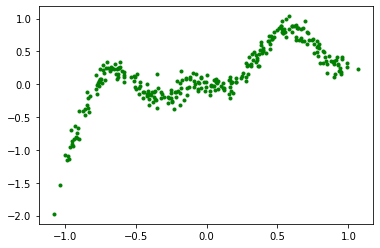

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [3]:
# ## Binary labeled data

# x = np.linspace(0,1,300)
# y= np.where(x<0.25, -0.5, 1)

# noise = np.random.normal(0,0.02, x.shape)

# x = x + noise
# noise = np.random.normal(0,0.1, x.shape)
# y = y + noise

# indx = np.argsort(x)
# x = x[indx]
# y = y[indx]

# x = x*2
# x = x - x.mean() # good practice to zero-center x in linear mapping
# xx = x.reshape(-1,1)
# yy = y.reshape(-1,1)

# %matplotlib inline
# plt.scatter(x, y, marker='.', color='g')
# plt.show()

## Find best split with gradient descent -- scale error around break point with gaussian

In [7]:
optim = tnn.Adam()
linear = tnn.LinearLayer(1,1,optimizer=optim)

c0 = np.array([0.])
c1 = np.array([0.])

optim = tnn.SGD(1)
c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

gaussian = tnn.Gaussian()

In [8]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
    
    mask0 = lout>0 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
#     dlout = dy0*c0*mask0 + dy1*c1*mask1
#     dx = linear.backward(dlout*err_scaler)
#     dx = linear.backward((dy*mask0-dy*mask1)*err_scaler)
#     dx = linear.backward(dy*err_scaler)
    dx = linear.backward(-dy*err_scaler)

    
    
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1
    
    linear.update()
#     if np.count_nonzero(mask0)==0 or np.count_nonzero(mask1)==0:
#         print("Mask error")
#     c0 = np.mean(yy[mask0])
#     c1 = np.mean(yy[mask1])
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dy*err_scaler).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.2172569587937567


100 Error =  0.12031453894078786


200 Error =  0.11528987698649819


300 Error =  0.11323859285303624


400 Error =  0.11123740184246936


500 Error =  0.10984817506890646


600 Error =  0.10689176793985623


700 Error =  0.10502816112759718


800 Error =  0.1042389805706965


900 Error =  0.10325652305571084


1000 Error =  0.10157985128816001


1100 Error =  0.10158238832614569


1200 Error =  0.10326762737753555


1300 Error =  0.10326910751653444


1400 Error =  0.1015791308274186


1500 Error =  0.10326620839093172


1600 Error =  0.10326784011671257


1700 Error =  0.10157993607772811


1800 Error =  0.10157895338420428


1900 Error =  0.10326076504872654


2000 Error =  0.10157976827705047


2100 Error =  0.1015792127490484


2200 Error =  0.10157942118666877


2300 Error =  0.10326033194085514


2400 Error =  0.10326769539862722


2500 Error =  0.10158489430652336


2600 Error =  0.10157894497534535


2700 Error =  0.1015818382453539


2800 Erro

TclError: invalid command name "pyimage22"

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [27]:
error, linear.weights, linear.bias

(0.0713590877440038, array([[3.73887895]]), array([-0.82939235]))

In [28]:
np.count_nonzero(mask0), np.count_nonzero(mask1)

(116, 184)

In [29]:
'''
This problem needs different type of gradient
* We can move the decision boundary using gaussian based optimization.
* The decision boundary looks at the two sides of it (locally)
* The error is calculated as the resulting shift that 
'''

'\nThis problem needs different type of gradient\n* We can move the decision boundary using gaussian based optimization.\n* The decision boundary looks at the two sides of it (locally)\n* The error is calculated as the resulting shift that \n'

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1530, in _draw
    def _draw(renderer): raise D

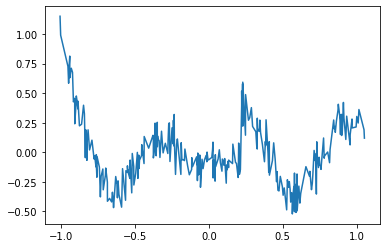

In [30]:
plt.plot(x,dy)

In [31]:
gaussian = tnn.Gaussian()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1530, in _draw
    def _draw(renderer): raise D

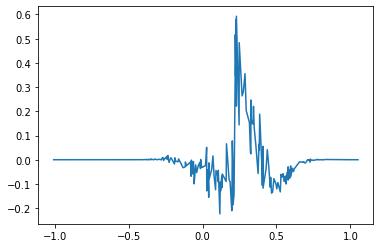

In [32]:
plt.plot(x, gaussian.forward(lout)*dy)

In [33]:
(gaussian.forward(lout)*dy).mean()

0.0007394906455243532

## Sigmoid based,, it has gaussian gradient scaling

In [10]:
optim = tnn.Adam()
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

optim = tnn.SGD(1)
c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

In [11]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
#     dlout = dy0*c0*mask0 + dy1*c1*mask1
#     dx = linear.backward(dlout*err_scaler)
    dx = linear.backward(sigmoid.backward(-dy/0.25))
#     dx = linear.backward(dy)#/0.25)
    
    linear.update()
    
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1

#     if np.count_nonzero(mask0)==0 or np.count_nonzero(mask1)==0:
#         print("Mask error")
#     c0 = np.mean(yy[mask0])
#     c1 = np.mean(yy[mask1])

#     dy = yout - yy
#     dx = linear.backward(dy)
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, sigmoid.backward(dy).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.2172569587937567


100 Error =  0.12346508723857162


200 Error =  0.1203082049874835


300 Error =  0.11823404271723294


400 Error =  0.11633293681979005


500 Error =  0.11405806062650856


600 Error =  0.1132393132145972


700 Error =  0.11267430771371956


800 Error =  0.11171874541839508


900 Error =  0.1112374017515581


1000 Error =  0.11045603182104662


1100 Error =  0.10984943916958234


1200 Error =  0.1089510794018616


1300 Error =  0.10895535016293674


1400 Error =  0.1079883896092699


1500 Error =  0.10799069279391436


1600 Error =  0.10689228297155295


1700 Error =  0.10689176747719162


1800 Error =  0.10641301577029491


1900 Error =  0.10502881550450983


2000 Error =  0.10453042634691584


2100 Error =  0.10452875045657481


2200 Error =  0.10452984142458434


2300 Error =  0.10423898360358985


2400 Error =  0.10423966618753236


2500 Error =  0.10326311480556775


2600 Error =  0.10424412703523704


2700 Error =  0.10325668593141771


2800 Error

TclError: invalid command name "pyimage33"

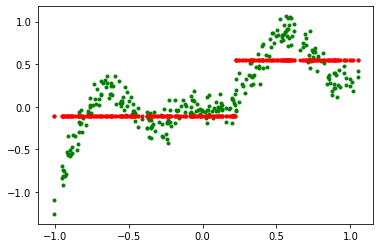

In [16]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [17]:
linear.weights, linear.bias

(array([[9.38759675]]), array([-2.09470759]))

## Greedy best split

In [18]:
splits = np.linspace(-1, 1, num=5000)

In [19]:
def measure_split(split):
    mask = xx<split
    y1 = yy[mask]
    y2 = yy[~mask]
    
    out = np.empty_like(yy)
    out[mask] = y1.mean()
    out[~mask] = y2.mean()
    
    error = ((out-yy)**2).mean()
    
    return out, error

In [20]:
best_out = None
best_split = None
best_error = 9e9
for split in splits:
    out, error = measure_split(split)
    if error<best_error:
        best_error = error
        best_split = split
        best_out = out

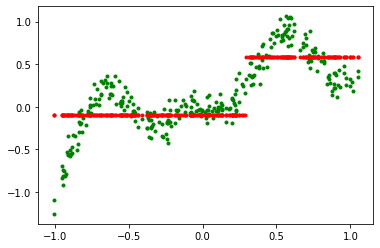

In [21]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, best_out.reshape(-1), color='r', marker='.')

In [22]:
best_error

0.0677886381485803

## Sigmoid based - Hard and soft combine

In [25]:
import copy

In [26]:
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

In [27]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    ## With splits
    lout = linear.forward(xx)
    
    mask0 = lout>0
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
    lout = dy0*c0*mask0 + dy1*c1*mask1
    dx = linear.backward(lout)
    
#     linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    c0 = np.mean(yy[mask0])
    c1 = np.mean(yy[mask1])
    yy_disc = np.empty_like(yy)
    yy_disc[mask0] = c0
    yy_disc[mask1] = c1

#     yy_disc = copy.deepcopy(yout)
    
    #### With sigmoid
    lout = sigmoid.forward(linear.forward(xx))   
       
    y0 = c0*lout
    y1 = c1*(1-lout)
    
    yout = y0 + y1
    
    dy = yout - yy_disc
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(lout)
    dc1 = dy1*(1-lout)
    
    dlout = dy0*c0 - dy1*c1
    dx = linear.backward(sigmoid.backward(dlout))
    
    linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    
#     lout = linear.forward(xx)
#     mask0 = lout>0
#     mask1 = ~mask0    
#     y0 = c0*mask0
#     y1 = c1*mask1
#     yout = y0 + y1
    dy = yout-yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
#         if error < 0.00025:
#             print('fitted to our expectation')
#             break

0 Error =  0.13243208968406725


100 Error =  0.12567328975094127


200 Error =  0.16197527147590776


300 Error =  0.17973282901853965


400 Error =  nan


/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.




500 Error =  nan


600 Error =  nan


700 Error =  nan


800 Error =  nan


TclError: invalid command name "pyimage60"

In [ ]:
dy

### Stochastic sigmoid training

In [61]:
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

In [62]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    ## With splits
    lout = linear.forward(xx)
    mask0 = lout>0
    mask1 = ~mask0    
    yout = c0*mask0 + c1*mask1
    
    c0 = np.mean(yy[mask0])
    c1 = np.mean(yy[mask1])
    yy_disc = np.empty_like(yy)
    yy_disc[mask0] = c0
    yy_disc[mask1] = c1

    #### With sigmoid
    lout = sigmoid.forward(linear.forward(xx))
    lout = np.array([np.random.binomial(1, p) for p in lout])
       
    y0 = c0*lout
    y1 = c1*(1-lout)
    
    yout = y0 + y1
    
    dy = yout - yy_disc
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(lout)
    dc1 = dy1*(1-lout)
    
    dlout = dy0*c0 - dy1*c1
    dx = linear.backward(sigmoid.backward(dlout))
    
    linear.update()
#     delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
#     c0 -= delc0
#     delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
#     c1 -= delc1
    
    
#     lout = linear.forward(xx)
#     mask0 = lout>0
#     mask1 = ~mask0    
#     y0 = c0*mask0
#     y1 = c1*mask1
#     yout = y0 + y1
    dy = yout-yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
#         if error < 0.00025:
#             print('fitted to our expectation')
#             break

0 Error =  0.22196094257494528


100 Error =  0.20560557388925096


200 Error =  0.18998930905918363


300 Error =  0.16964860388830186


400 Error =  0.16696345057356937


500 Error =  0.13571758140712806


600 Error =  0.15366269577678462


700 Error =  0.15568321803864701


800 Error =  0.13642277356008664


900 Error =  0.12190423021235267


1000 Error =  0.13531238002447085


1100 Error =  0.12651567546971212


1200 Error =  0.14736332958306722


1300 Error =  0.11807576938973478


1400 Error =  0.12973170289610353


1500 Error =  0.12566334735872803


1600 Error =  0.12520814170889266


1700 Error =  0.11252836996725915


1800 Error =  0.11462888799475972


1900 Error =  0.11140639315266275


2000 Error =  0.11371140260408823


2100 Error =  0.11347926852994245


2200 Error =  0.11285965418912769


2300 Error =  0.11464187214091266


2400 Error =  0.10765360094507935


2500 Error =  0.11772577446382916


2600 Error =  0.10929229363374793


2700 Error =  0.11576010803337568


2800

TclError: invalid command name "."

In [ ]:
lout

### Testing on binary data

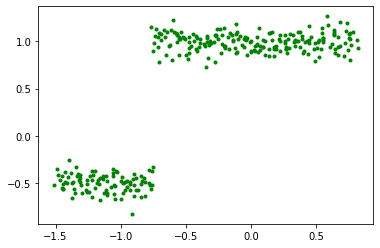

In [28]:
np.random.seed(13)
x = np.linspace(-1.5,0.8,300)
msk = x<-0.75
y = np.zeros_like(x)
y[msk] = -0.5
y[~msk] = 1

noise = np.random.normal(0,0.02, x.shape)
x = x + noise

indx = np.argsort(x)
x = x[indx]
y = y[indx]

noise = np.random.normal(0,0.1, x.shape)
y = y + noise

xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

### Training

In [29]:
# optim = tnn.Adam()
optim = tnn.SGD(0.1)
linear = tnn.LinearLayer(1,1,optimizer=optim)

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

gaussian = tnn.Gaussian()

In [30]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout)
    
    mask0 = lout>0
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
#     dx = linear.backward(dlout*err_scaler)
    dx = linear.backward(dy*err_scaler)
    
    linear.update()
    
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dy*err_scaler).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7503640430497204


100 Error =  0.11481167243246931


200 Error =  0.05949889195717659


300 Error =  0.03791602469095276


400 Error =  0.02357128145282732


500 Error =  0.01738658292322508


600 Error =  0.023048815930784516


700 Error =  0.017388585451901833


800 Error =  0.023047160377018282


900 Error =  0.02304703320801978


1000 Error =  0.017389067143480662


1100 Error =  0.01738834974734009


1200 Error =  0.017388952198099016


1300 Error =  0.023046958525391327


1400 Error =  0.017389225726282702


1500 Error =  0.01738886784192825


1600 Error =  0.02304637008550902


1700 Error =  0.017388624929751028


1800 Error =  0.01738877427212525


1900 Error =  0.017388592818074162


2000 Error =  0.023046206988325827


2100 Error =  0.01738886768585953


2200 Error =  0.0173892313046427


2300 Error =  0.017389345025057002


2400 Error =  0.017389038354307575


2500 Error =  0.02304564082207745


2600 Error =  0.017389075543029993


2700 Error =  0.0173894060283

TclError: invalid command name "pyimage71"